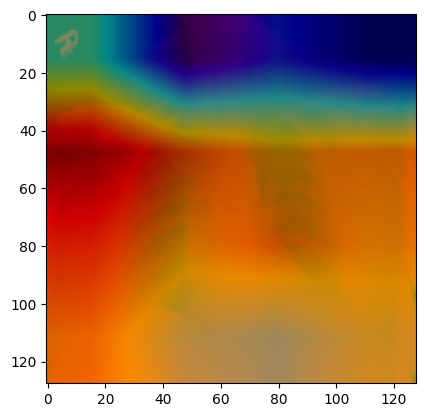

In [13]:
import matplotlib.pyplot as plt
import torch
import torchvision.transforms
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
import cv2
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
# from resnet import ResNet,Bottleneck
from resnet import ResNet,Bottleneck

from image_dataset import ImageDataset
from pathlib import Path
import numpy as np



model = ResNet(Bottleneck,layer_list=[1,3,4,2,1],num_classes=6,num_channels=1)

lastConvLayer= [model.layer4[-1]]

# print(lastConvLayer)

cam = GradCAM(model=model,target_layers=lastConvLayer)

trainData = ImageDataset(Path("data/X_train.npy"), Path("data/Y_train.npy"))

img = trainData.__getitem__(0)




targets = None

grayscale_cam = cam(input_tensor=img[0].unsqueeze(0), targets=targets)

# print(grayscale_cam[0].shape)
# quit()
grayscale_cam = grayscale_cam[0]





npimage = img[0][0].numpy()
# npimage=npimage.astype(np.uint8)

# print(npimage.cat([torch.zeros((128,128,1)),torch.zeros((128,128,1))]))
zeroes = np.zeros_like(npimage)
x = np.stack((npimage,zeroes,zeroes),axis=-1)
# print(x)


# quit()


visualization = show_cam_on_image(x, grayscale_cam, use_rgb=True)



model_outputs = cam.outputs

plt.imshow(visualization)
plt.show()


In [7]:
print(npimage)

[[0.02745098 0.02352941 0.02352941 ... 0.01176471 0.01960784 0.01960784]
 [0.00392157 0.00392157 0.00392157 ... 0.01176471 0.01568628 0.01960784]
 [0.00392157 0.00392157 0.00392157 ... 0.01176471 0.01568628 0.01960784]
 ...
 [0.57254905 0.654902   0.68235296 ... 0.78431374 0.5764706  0.5058824 ]
 [0.6039216  0.654902   0.68235296 ... 0.7490196  0.6156863  0.46666667]
 [0.6313726  0.67058825 0.69411767 ... 0.78039217 0.67058825 0.43137255]]


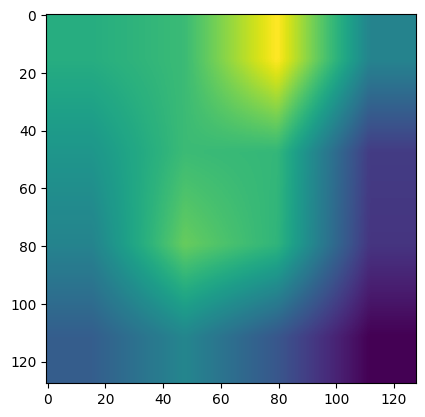

In [4]:
plt.imshow(grayscale_cam)